In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import  data_utils.data_analysis as data_analysis

In [2]:
filename='galadriel_dataset_24_04_11.h5'
df_input=pd.read_hdf(filename,'df_input')
df_time=pd.read_hdf(filename,'df_time')
df_freq_int=pd.read_hdf(filename,'df_freq_int')

#get the arrays and print them
print('Input DF')
print(df_input)

print('----')
print('Time values')
df_time_val=df_time.loc[0]
print(df_time_val)

print('----')
print("Intensity")
df_time= df_time.drop([0]) #drop the time values
df_time.reset_index(inplace=True,drop=True) #to start again from 0 (as the other DataFrames)
#df_time = df_time.drop('index', axis=1)
print(df_time)

print('----')
print("Freq values")
df_freq_val=df_freq_int.loc[0]
print(df_freq_val)

print('----')
print("Frequency intesity")
df_freq_int= df_freq_int.drop([0]) #drop the freq values
df_freq_int.reset_index(inplace=True,drop=True)
#df_freq_int = df_freq_int.drop('index', axis=1)
print(df_freq_int)

Input DF
       shot number  order2  order3     order4
0            36612   34900  -17000 -4600000.0
1            36613   34900  -17000 -4600000.0
2            36614   34900  -17000 -4500000.0
3            36615   34900  -17000 -4500000.0
4            36616   34900  -17000 -4500000.0
...            ...     ...     ...        ...
15503        52116   35400   29000 -3800000.0
15504        52117   35400   29000 -3800000.0
15505        52118   35400   29000 -3700000.0
15506        52119   35400   29000 -3700000.0
15507        52120   35400   29000 -3700000.0

[15508 rows x 4 columns]
----
Time values
0    -94.466005
1    -83.969782
2    -73.473559
3    -62.977336
4    -52.481114
5    -41.984891
6    -31.488668
7    -20.992445
8    -10.496223
9      0.000000
10    10.496223
11    20.992445
12    31.488668
13    41.984891
14    52.481114
15    62.977336
16    73.473559
17    83.969782
Name: 0, dtype: float64
----
Intensity
             0         1         2         3         4         5     

In [3]:
df_input.describe()

,shot number,order2,order3,order4
count,15508.000000,15508.000000,15508.000000,1.550800e+04
mean,44366.449445,35150.000000,5998.323446,-4.116675e+06
std,4477.001466,158.103686,13564.693141,2.910531e+05
min,36612.000000,34900.000000,-17000.000000,-4.600000e+06
25%,40489.750000,35000.000000,-6000.000000,-4.400000e+06
50%,44366.500000,35150.000000,6000.000000,-4.100000e+06
75%,48243.250000,35300.000000,18000.000000,-3.900000e+06
max,52120.000000,35400.000000,29000.000000,-3.600000e+06


Text(0.5, 1.0, 'Frequency')

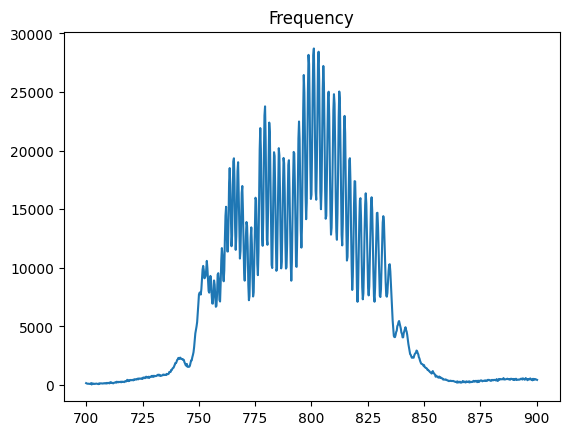

In [4]:
#plot a random shot
plt.plot(df_freq_val,df_freq_int.loc[500])
#plt.plot(df_freq_val)
plt.title('Frequency')

Text(0.5, 1.0, 'Pulse shape')

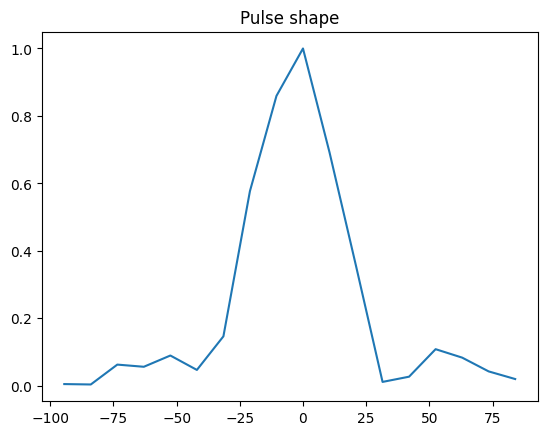

In [5]:
plt.plot(df_time_val,df_time.loc[500])
plt.title('Pulse shape')

## Check for extreme values in the raw data

In [6]:
#look for bad datapoints in the raw data
maxval_freq=df_freq_int.max(axis=1)
for i,v in maxval_freq.items():
    if(v<8000 or v>65000):
        print(i,v)

934 65535.0
1024 65535.0
1113 65535.0
1172 65535.0
1202 65535.0
1203 65535.0
1204 65535.0
1232 65535.0
1233 65535.0
1234 65535.0
1235 65535.0
1236 65535.0
1238 65535.0
1262 65535.0
1263 65535.0
1264 65535.0
1265 65535.0
1266 65535.0
1267 65535.0
1292 65535.0
1293 65535.0
1294 65535.0
1295 65535.0
1296 65535.0
1297 65535.0
1298 65535.0
1299 65535.0
1300 65535.0
1322 65535.0
1323 65535.0
1324 65535.0
1325 65535.0
1326 65535.0
1327 65535.0
1328 65535.0
1329 65535.0
1330 65535.0
1352 65535.0
1353 65535.0
1354 65535.0
1356 65535.0
1357 65535.0
1359 65535.0
1360 65535.0
1361 65535.0
1362 65535.0
1363 65535.0
1382 65535.0
1383 65535.0
1384 65535.0
1385 65535.0
1386 65535.0
1387 65535.0
1388 65535.0
1389 65535.0
1391 65535.0
1392 65535.0
1393 65535.0
2404 65535.0
2432 65535.0
2462 65535.0
2583 65535.0
2612 65535.0
2614 65535.0
2642 65535.0
2643 65535.0
2644 65535.0
2645 65535.0
2672 65535.0
2673 65535.0
2674 65535.0
2675 65535.0
2676 65535.0
2677 65535.0
2702 65535.0
2703 65535.0
2704 65535.0


Text(0, 0.5, 'Num. shots')

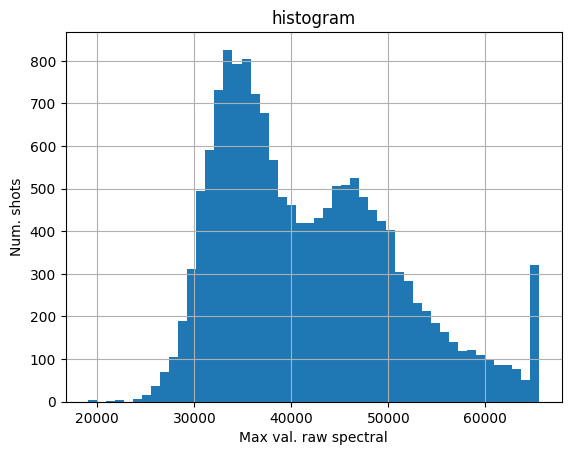

In [7]:
maxval_freq.hist(bins=50)
plt.title('histogram')
plt.xlabel('Max val. raw spectral')
plt.ylabel('Num. shots')

### Random shot with max spectral>65k

38005


Text(0.5, 1.0, 'Frequency shot #38005')

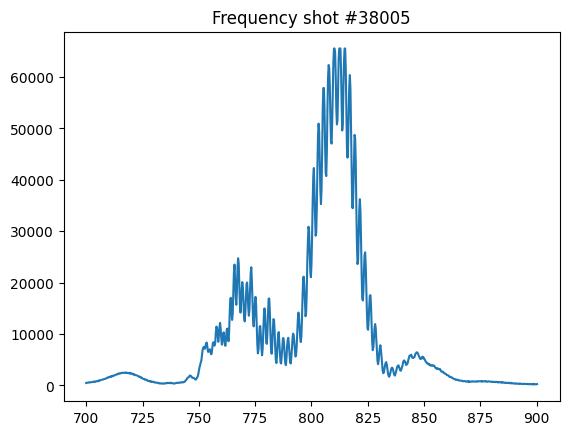

In [8]:
index_shot=1392
num_shot=df_input['shot number'].loc[index_shot]
print(num_shot)
plt.plot(df_freq_val,df_freq_int.loc[index_shot])
#plt.plot(df_freq_val,df_freq_int.loc[1605])
plt.title('Frequency shot #'+str(num_shot))

Text(0.5, 1.0, 'Pulse shape shot #38005')

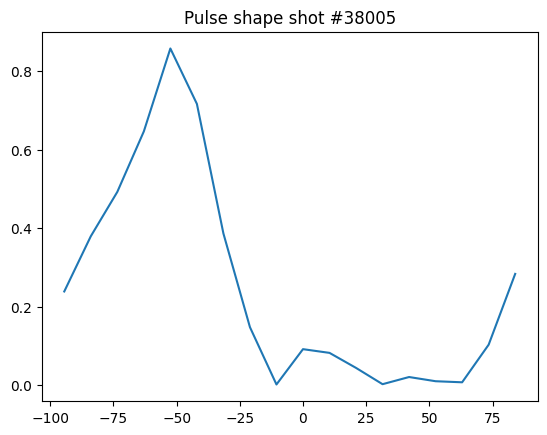

In [9]:
plt.plot(df_time_val,df_time.loc[index_shot])
#plt.plot(df_time_val,df_time.loc[1605])
plt.title('Pulse shape shot #'+str(num_shot))

## Variance Analysis

In [10]:
#get the shot number from the test index
#(potential bug: pass the right df_input that has been used to create y_test. For example: df_input_clean)
def get_shot_num(shot_index,y_test,df_input):
    #print(y_test.iloc[shot_index])
    #print(y_test.iloc[shot_index])
    id_value=y_test.iloc[shot_index].name
    #print(df_time_clean.loc[id_value])
    #print(y_test_reset.loc[shot_index])
    #print(df_input_clean.loc[id_value])
    return(df_input['shot number'].loc[id_value])

In [11]:
#The function calculates the variance from the shots with the same input parameters and store it in a DF with SAME size (so there is redundant data)
#dup_shots should be the maximum number of duplicate shots (-1) but is OK if higher (but slower algorithm)

def get_var(df_input,df_time,dup_shots):
    list_aux=[]
    for index,row in df_input.iterrows():
        o2=row['order2']
        o3=row['order3']
        o4=row['order4']
        #check if the previous and following rows were the same
        time_list=[]
        for i in range(index-dup_shots,index+dup_shots+1):
            if (i>=0 and i<=len(df_input)-1):
                #print(index,dup_shots,i)
                df_aux=df_input.iloc[i] #row to check
                if (df_aux['order2']==o2 and df_aux['order3']==o3 and df_aux['order4']==o4):
                    time_list.append(df_time.iloc[i].to_list()) #store the rows with same parameters in a list
        time_list=np.array(time_list)
        time_list=np.var(time_list,axis=0)
        list_aux.append(time_list)
            
    #create the dataframe from the list
    df_time_var=pd.DataFrame(list_aux)
    #print(df_time)
    #print(df_time_var)
    return df_time_var

In [12]:
dup_shots=2 #max number of duplicate shots -1
df_time_var = get_var(df_input,df_time,dup_shots)
df_time_var_sum=df_time_var.sum(axis=1)

Text(0.5, 1.0, 'Histogram      (total num. shots=15508)')

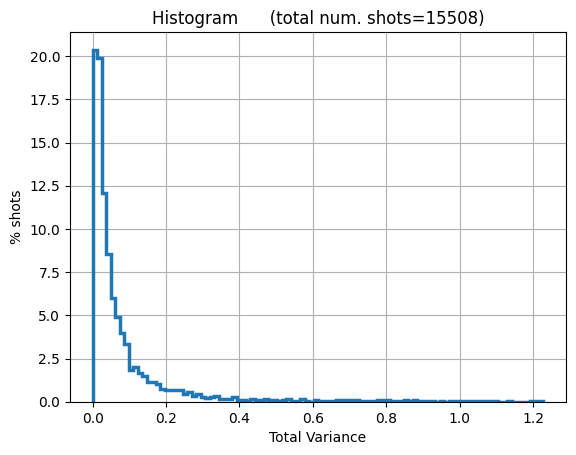

In [13]:
weights_time = 100*np.ones_like(df_time_var_sum) / len(df_time_var_sum)
df_time_var_sum.hist(bins=100,weights=weights_time,histtype="step",linewidth=2.5)
plt.ylabel('% shots')
plt.xlabel('Total Variance')
plt.title('Histogram      (total num. shots='+str(len(df_time_var_sum))+')')

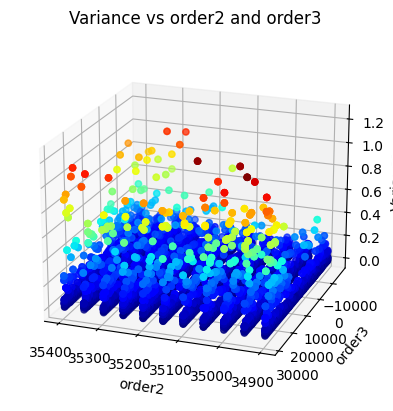

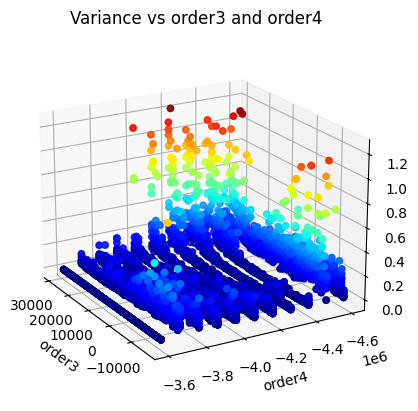

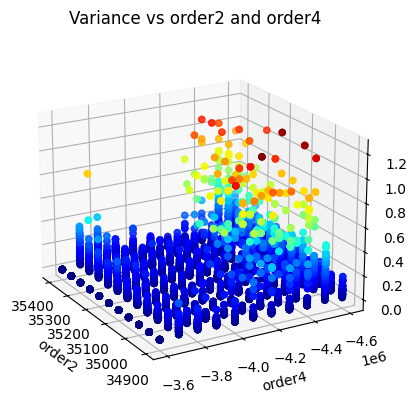

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_input['order2'], df_input['order3'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax.set_xlabel('order2')
ax.set_ylabel('order3')
ax.set_zlabel('Variance')
ax.view_init(elev=20., azim=110)
plt.title('Variance vs order2 and order3')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(df_input['order3'], df_input['order4'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax2.set_xlabel('order3')
ax2.set_ylabel('order4')
ax2.set_zlabel('Variance')
ax2.view_init(elev=20., azim=150)
plt.title('Variance vs order3 and order4')
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(projection='3d')
ax3.scatter(df_input['order2'], df_input['order4'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax3.set_xlabel('order2')
ax3.set_ylabel('order4')
ax3.set_zlabel('Variance')
ax3.view_init(elev=20., azim=150)
plt.title('Variance vs order2 and order4')
plt.show()

### Variance analysis: drop saturated shots

In [15]:
#drop shots with raw data> 65000
value=65000
df_input_clean,df_time_clean,df_freq_int_clean = data_analysis.clean_shots_above(value,df_input,df_time,df_freq_int)


Shots with max val above this will be discarded: 65000



In [16]:
dup_shots=2
df_time_clean_var=get_var(df_input_clean,df_time_clean,dup_shots)
df_time_clean_var_sum=df_time_clean_var.sum(axis=1)

Text(0.5, 1.0, 'Histogram      (total num. shots=15199)')

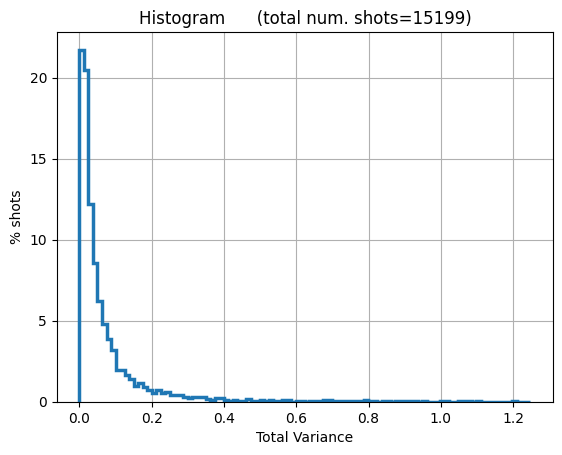

In [17]:
weights_time_clean = 100*np.ones_like(df_time_clean_var_sum) / len(df_time_clean_var_sum)
df_time_clean_var_sum.hist(bins=100,weights=weights_time_clean,histtype="step",linewidth=2.5)
plt.ylabel('% shots')
plt.xlabel('Total Variance')
plt.title('Histogram      (total num. shots='+str(len(df_time_clean_var_sum))+')')

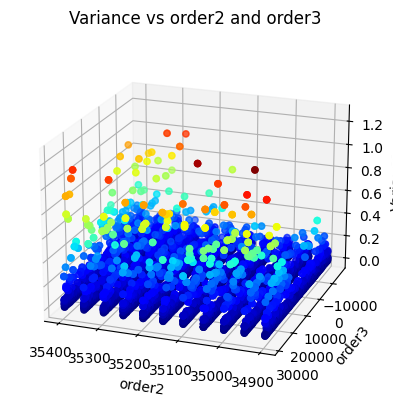

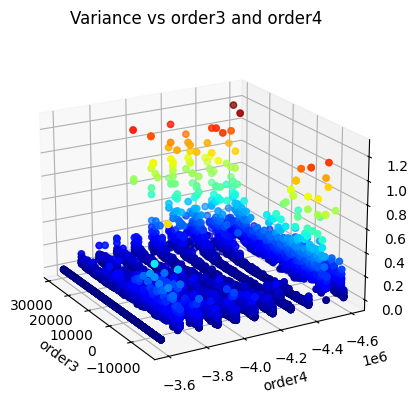

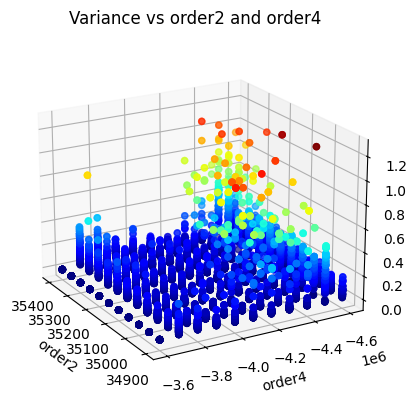

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_input_clean['order2'], df_input_clean['order3'], df_time_clean_var_sum,c=df_time_clean_var_sum,cmap='jet')
ax.set_xlabel('order2')
ax.set_ylabel('order3')
ax.set_zlabel('Variance')
ax.view_init(elev=20., azim=110)
plt.title('Variance vs order2 and order3')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(df_input_clean['order3'], df_input_clean['order4'], df_time_clean_var_sum,c=df_time_clean_var_sum,cmap='jet')
ax2.set_xlabel('order3')
ax2.set_ylabel('order4')
ax2.set_zlabel('Variance')
ax2.view_init(elev=20., azim=150)
plt.title('Variance vs order3 and order4')
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(projection='3d')
ax3.scatter(df_input_clean['order2'], df_input_clean['order4'], df_time_clean_var_sum,c=df_time_clean_var_sum,cmap='jet')
ax3.set_xlabel('order2')
ax3.set_ylabel('order4')
ax3.set_zlabel('Variance')
ax3.view_init(elev=20., azim=150)
plt.title('Variance vs order2 and order4')
plt.show()